# Titanic Survival  
## Competition by Kaggle
### Juliano Garcia

#### Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Step 1: Define the problem!

As per the competition description we need to develop an algorithm to predict the survival of a list of passengers

## Step 2: Import data and basic understanding

In [1]:
# Importing data wrangling and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing the train dataset
df = pd.read_csv('train.csv')

# importing the test dataset
df_pred = pd.read_csv('test.csv')

# And let's check how the data looks like!
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
231,232,0,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.7750,NaN,S
552,553,0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q


In [3]:
# Let's check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Some observations of the data:
- The ___Survived___ attribute is the target variable. Binary, 1 for Yes (Survived) and 0 for No (Not Survived)
- ___PassangerId___ and _Ticket_ seems to be random, and won't have any relation to the outcome whatsoever
- The ___Pclass___ is a ordinal for the ticket class, proxy for a socialeconomic class (1 - Upper, 2 - Mid and 3 - Lower)
- ___Name___ could be used with feature engineering to give some details on gender, status, family size, etc
- ___Sex___ and ___Embarked___ are nominal and therefore should be converted to dummy variables for our predictive model
- ___Age___ and ___Fare___ are continuous quantitative data
- ___SibSp___ represents the number of sibilings or spouse on board, while ___Parch___ represents the number of parents and children on board, could be used to create family size and a "is alone" dummy
- ___Cabin___ is a nominal variable, might be useful to determine the location on the ship, however it appears we have a lot of missing values (204 values out of 891 rows)! Therefore should be excluded from the model in order to not create any bias

Now let us create a copy of the dataset for messing arround it, and also a referencing variable so we can perform operations on both the train and test dataframes

In [4]:
# Copy dataframe
df1 = df.iloc[:, :]
df_pred1 = df_pred.iloc[:, :]

# Create a list of both dataframes
both = [df1, df_pred1]

## Step 3: Data Cleaning

1. Correct aberant values and outliers
2. Complete missing information
3. Create new features
4. Casting variables to correct format

### 1. Correct aberant values and outliers

It does not appear we have any aberant values, however we might have some outliers on the ___Age___ and ___Fare___ attributes, both since we didn't see any absurd values on the .describe() method we will waint until we finish our exploratory analysis to tackle it

### 2. Complete missing information

Let's check the count of null values

In [5]:
# For the Train Set
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# and the Test Set
df_pred1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- ___Age___ we will complete with the mediam
- ___Fare___ we will complete with the mediam
- ___Cabin___ we will exclude from the dataframe
- ___Embarked___ we will replace with the mode

In [7]:
for dataset in both:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

# Let's delete the cabin attribute and also PassengerId and Ticket, already stated above
df1.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [8]:
# Let's check the null values again
print(df1.isnull().sum())
print('-'*20)
print(df_pred1.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


### 3. Create new features

Let us create some new features:
- Family Size
- Is Alone
- Title
- Fare Bin
- Age Bin

In [9]:
for dataset in both:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = dataset['FamilySize'] == 1
    dataset['IsAlone'] = dataset['IsAlone'].astype('int')
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataset['FareBin'] = pd.cut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype('int'), 5)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB


In [12]:
df1.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
335,0,3,"Denkoff, Mr. Mitto",male,28.0,0,0,7.8958,S,1,1,Mr,"(-0.512, 128.082]","(16.0, 32.0]"
118,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,247.5208,C,2,0,Mr,"(128.082, 256.165]","(16.0, 32.0]"
392,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,7.9250,S,3,0,Mr,"(-0.512, 128.082]","(16.0, 32.0]"
663,0,3,"Coleff, Mr. Peju",male,36.0,0,0,7.4958,S,1,1,Mr,"(-0.512, 128.082]","(32.0, 48.0]"
854,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,26.0000,S,2,0,Mrs,"(-0.512, 128.082]","(32.0, 48.0]"
709,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,28.0,1,1,15.2458,C,3,0,Master,"(-0.512, 128.082]","(16.0, 32.0]"
547,1,2,"Padro y Manent, Mr. Julian",male,28.0,0,0,13.8625,C,1,1,Mr,"(-0.512, 128.082]","(16.0, 32.0]"
204,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,8.0500,S,1,1,Mr,"(-0.512, 128.082]","(16.0, 32.0]"
544,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,106.4250,C,2,0,Mr,"(-0.512, 128.082]","(48.0, 64.0]"
462,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,38.5000,S,1,1,Mr,"(-0.512, 128.082]","(32.0, 48.0]"


Le's see how the Title attribute is distributed

In [14]:
df1['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
the Countess      1
Mme               1
Don               1
Lady              1
Jonkheer          1
Sir               1
Capt              1
Ms                1
Name: Title, dtype: int64

For statistical purpose, let's eliminate the titles with fewer than __10__ entries

In [15]:
# Selects the titles to delete in both datasets
title_del = (pd.concat([df1, df_pred1], sort=False)['Title'].value_counts() < 10)

# Replace them with "Other"
for dataset in both:
    dataset['Title'] = dataset['Title'].apply(lambda x: 'Other' if title_del.loc[x] == True else x)

# Let's see how it looks like
df1['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

### 4. Correcting formats

Let's convert the categorical data to dummies for our mathematical analysis

In [16]:
# Import the library
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [17]:
# Crete the encoder object
encoder = LabelEncoder()

to_encode = [('Sex', 'Sex_Coded'), ('Embarked', 'Embarked_Coded'), ('Title', 'Title_Coded'), 
             ('FareBin', 'Fare_Coded'), ('AgeBin', 'Age_Coded')]

# Fit and transform using the Train set and transform the test set
for dataset in both:
    for a in to_encode:
        dataset[a[1]] = encoder.fit_transform(dataset[a[0]])

In [18]:
df1.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Coded,Embarked_Coded,Title_Coded,Fare_Coded,Age_Coded
569,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,7.8542,S,1,1,Mr,"(-0.512, 128.082]","(16.0, 32.0]",1,2,2,0,1
354,0,3,"Yousif, Mr. Wazli",male,28.0,0,0,7.2250,C,1,1,Mr,"(-0.512, 128.082]","(16.0, 32.0]",1,0,2,0,1
369,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,69.3000,C,1,1,Other,"(-0.512, 128.082]","(16.0, 32.0]",0,0,4,0,1
363,0,3,"Asim, Mr. Adola",male,35.0,0,0,7.0500,S,1,1,Mr,"(-0.512, 128.082]","(32.0, 48.0]",1,2,2,0,2
107,1,3,"Moss, Mr. Albert Johan",male,28.0,0,0,7.7750,S,1,1,Mr,"(-0.512, 128.082]","(16.0, 32.0]",1,2,2,0,1


Now let's create our dummies!

In [19]:
df1_dummy = pd.get_dummies(df1[['Sex', 'Embarked', 'Title']])
df_pred1_dummy = pd.get_dummies(df_pred1[['Sex', 'Embarked', 'Title']])
df1_dummy.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,1,0,0,1,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0
3,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,0,0,1,0,0


We will get back to it latter!

## Exploratory Data Analysis (EDA)

In [24]:
# List the features to be used on the analysis
features = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']

# Set the target
target = ['Survived']

In [27]:
# Let's check the Survived mean for each non continuous attribute
for feature in features:
    if df1[feature].dtype != 'float64' :
        print(df1[[feature, target[0]]].groupby(feature, as_index=False).mean())
        print('-'*20, '\n')

      Sex  Survived
0  female  0.742038
1    male  0.188908
-------------------- 

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
-------------------- 

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
-------------------- 

    Title  Survived
0  Master  0.575000
1    Miss  0.697802
2      Mr  0.156673
3     Mrs  0.792000
4   Other  0.444444
-------------------- 

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
-------------------- 

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
-------------------- 

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.00000

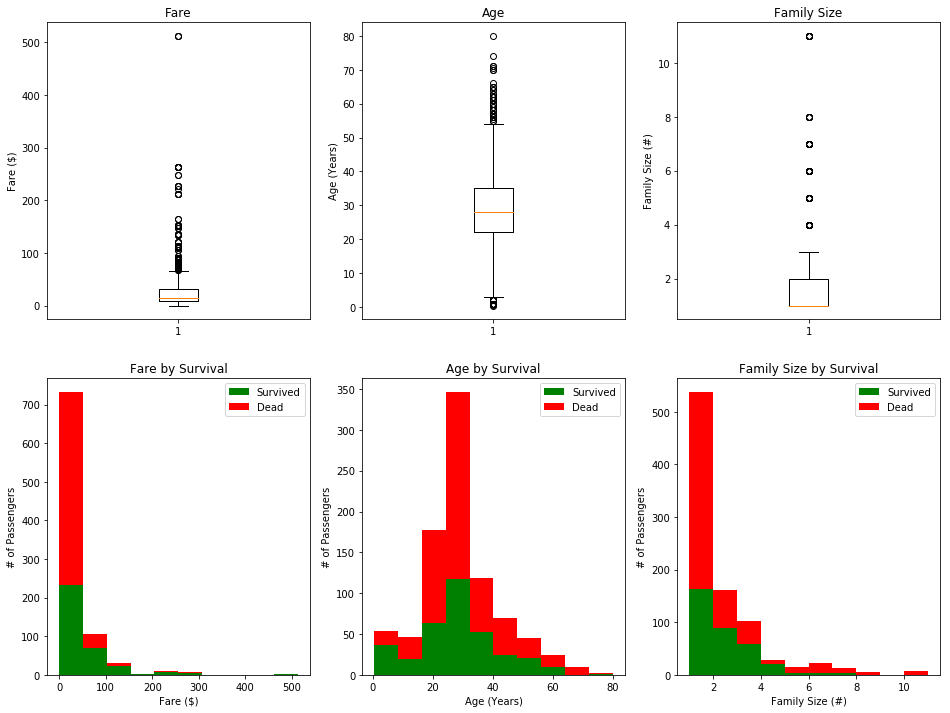

In [38]:
# Let's get visual for the continuous attributes
plt.figure(figsize=[16,12])

# Plot Fare as boxplot to identify outliers
plt.subplot(231)
plt.boxplot(x=df1['Fare'])
plt.title('Fare')
plt.ylabel('Fare ($)')

# Also let's plot Age in a boxplot
plt.subplot(232)
plt.boxplot(df1['Age'])
plt.title('Age')
plt.ylabel('Age (Years)')

# How about family size?
plt.subplot(233)
plt.boxplot(df1['FamilySize'])
plt.title('Family Size')
plt.ylabel('Family Size (#)')

# Now how would Fare affect survivability?
plt.subplot(234)
plt.hist(x = [df1[df1['Survived']==1]['Fare'], df1[df1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

# Age and survivability
plt.subplot(235)
plt.hist(x = [df1[df1['Survived']==1]['Age'], df1[df1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

# Family size and survivability
plt.subplot(236)
plt.hist(x = [df1[df1['Survived']==1]['FamilySize'], df1[df1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


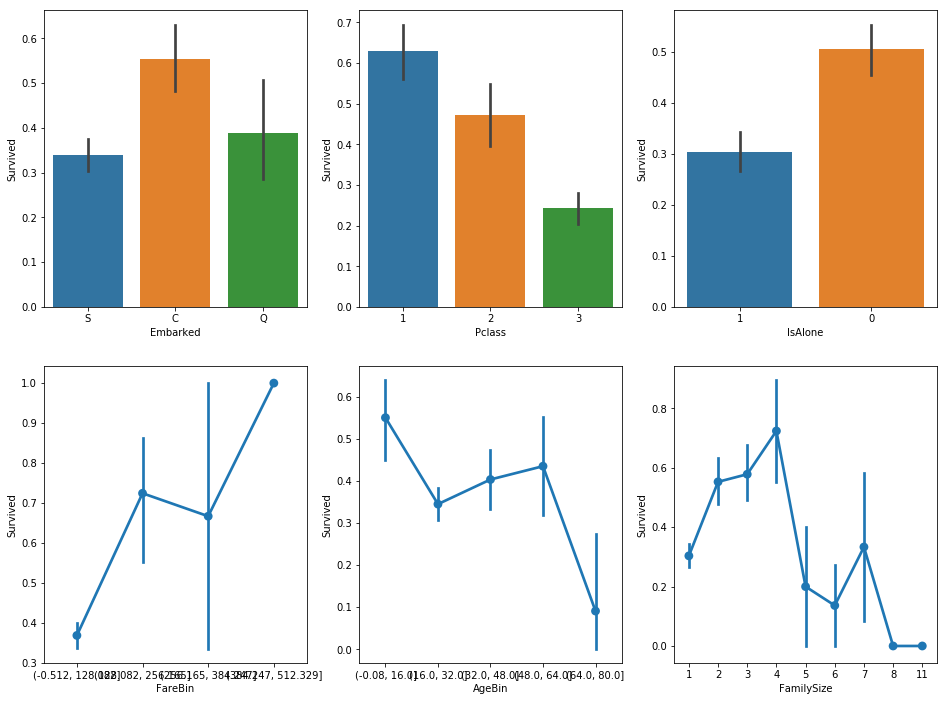

In [37]:
#Now let's visualize the 
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=df1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=df1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=df1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=df1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=df1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=df1, ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

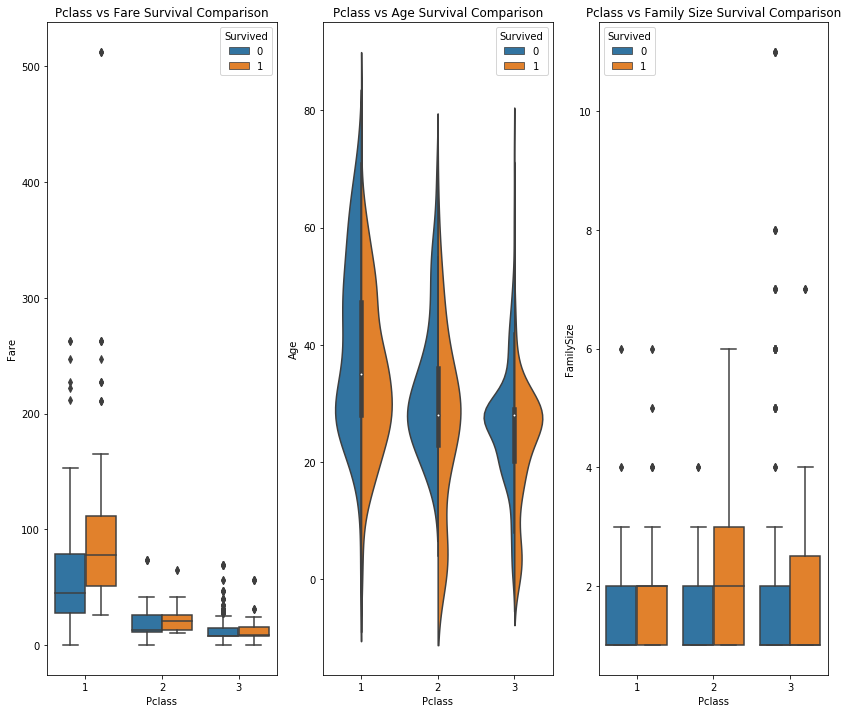

In [40]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = df1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = df1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

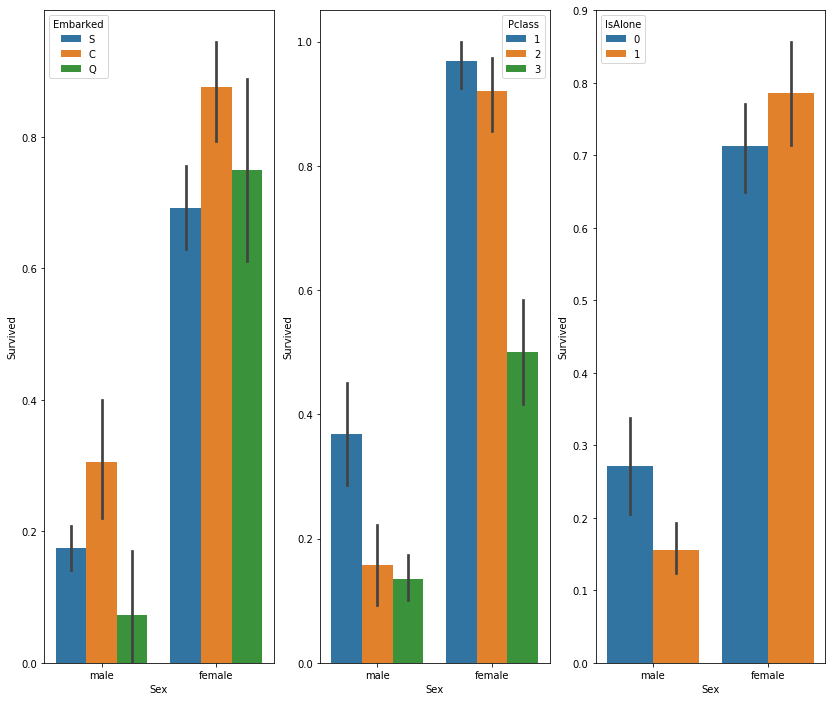

In [41]:
#graph distribution of qualitative data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=df1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=df1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=df1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

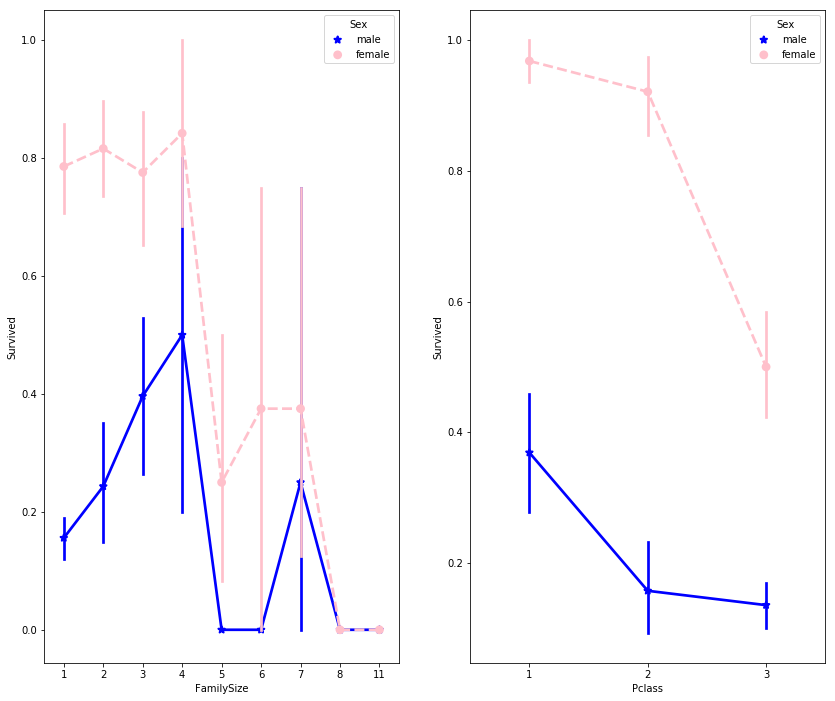

In [42]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=df1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=df1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

/home/jupyterlab/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/jupyterlab/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


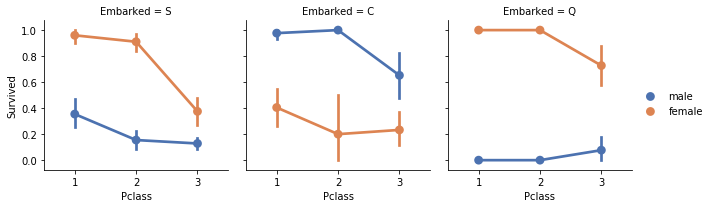

In [43]:
#how does embark port factor with class, sex, and survival compare
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(df1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

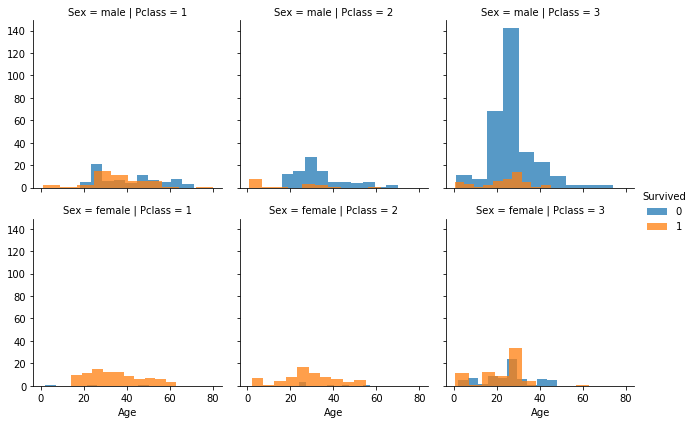

In [46]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(df1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

In [49]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Coded,Embarked_Coded,Title_Coded,Fare_Coded,Age_Coded
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.512, 128.082]","(16.0, 32.0]",1,2,2,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(-0.512, 128.082]","(32.0, 48.0]",0,0,3,0,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(-0.512, 128.082]","(16.0, 32.0]",0,2,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(-0.512, 128.082]","(32.0, 48.0]",0,2,3,0,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(-0.512, 128.082]","(32.0, 48.0]",1,2,2,0,2


In [188]:
pred_atributes = ['Pclass', 'Embarked_Coded', 'IsAlone', 'Sex_Coded', 'Title_Coded', 'Age_Coded']
X = df1[pred_atributes]
Y = df1['Survived']
X_pred = df_pred1[pred_atributes]

## Building the model

In [189]:
# first let us split the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [190]:
# Importing the library
from sklearn import ensemble

In [191]:
# Using random forest model anf fit with Train Set
forest = ensemble.RandomForestClassifier(n_estimators=20)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [192]:
# Now let's predict the Test set
Yhat_test = forest.predict(X_test)
Yhat_test[:6]

array([0, 0, 0, 0, 0, 0])

In [193]:
# Now let us compare
compare = Y_test == Yhat_test
compare.mean()

0.8100558659217877

In [194]:
# Now let's fit the whole dataset
forest.fit(X, Y)
Yhat = forest.predict(X)

final = Y == Yhat
final.mean()

0.8406285072951739

In [195]:
# Now let us predict the Predict Dataset
Y_pred = forest.predict(X_pred)

# Create the output dataframe
output = pd.concat([df_pred[['PassengerId']], pd.Series(Y_pred)], axis=1)
output.rename(columns={0 : 'Survived'}, inplace=True)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [196]:
# Let`s export the CSV
output.to_csv('output.csv', index=None)